# Body Fat Predictor

This project estimates the percentage of body fat in a human's body based on parameters such as weight, height, hip size and many more. 

## Data Set

Lists estimates of the percentage of body fat determined by underwater weighing and various body circumference measurements for 252 men.

The features contained in the dataset;

1. Density determined from underwater weighing
2. Percent body fat from Siri's (1956) equation
3. Age (years)
4. Weight (lbs)
5. Height (inches)
6. Neck circumference (cm)
7. Chest circumference (cm)
8. Abdomen 2 circumference (cm)
9. Hip circumference (cm)
10. Thigh circumference (cm)
11. Knee circumference (cm)
12. Ankle circumference (cm)
13. Biceps (extended) circumference (cm)
14. Forearm circumference (cm)
15. Wrist circumference (cm)


**Source**

The dataset is gotten from [kaggle](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset).

The data were generously supplied by Dr. A. Garth Fisher who gave permission to freely distribute the data and use for non-commercial purposes.

Roger W. Johnson
Department of Mathematics & Computer Science
South Dakota School of Mines & Technology
501 East St. Joseph Street
Rapid City, SD 57701

- email address: rwjohnso@silver.sdsmt.edu
- web address: http://silver.sdsmt.edu/~rwjohnso

In [33]:
# Import dependancies
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
# Import dataset
df = pd.read_csv("body_fat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


## Exploratory Data Analysis

In [4]:
df.shape

(252, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


### KDE Distribution Plots
When given numerical variables, it is important find the distribution of the variables.

Below we will define a function that plots the distribution of each numerical feature against the target column (`bodyFat`)

Distribution plots for Density feature is shown below


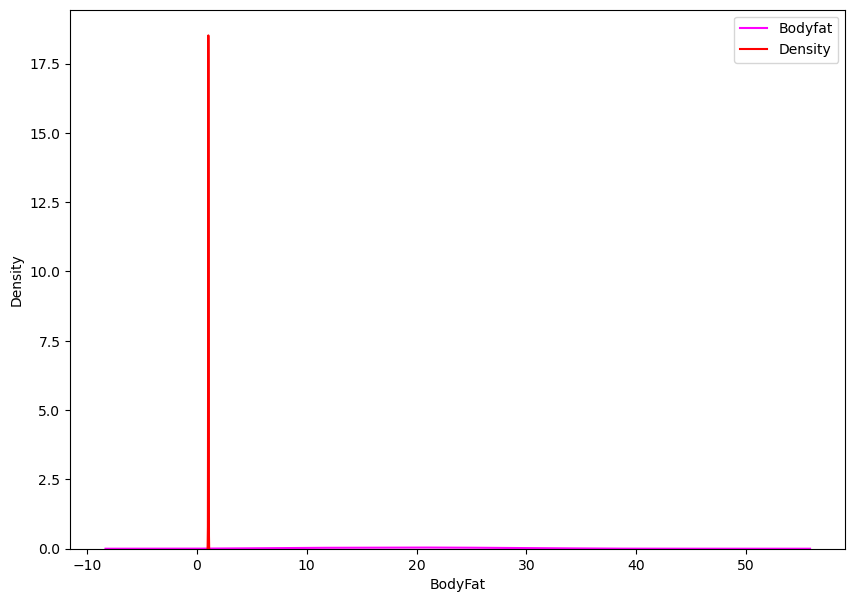

....................................................................................................
Distribution plots for BodyFat feature is shown below


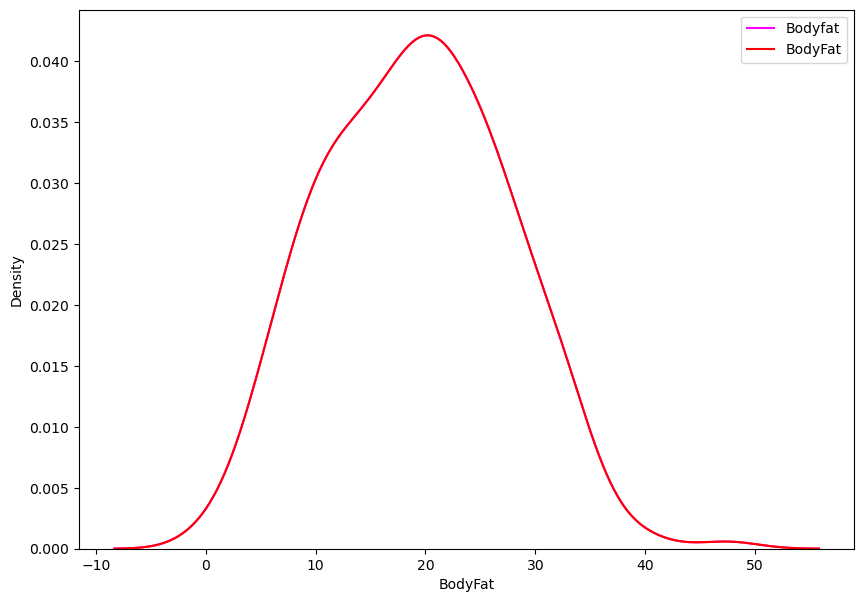

....................................................................................................
Distribution plots for Age feature is shown below


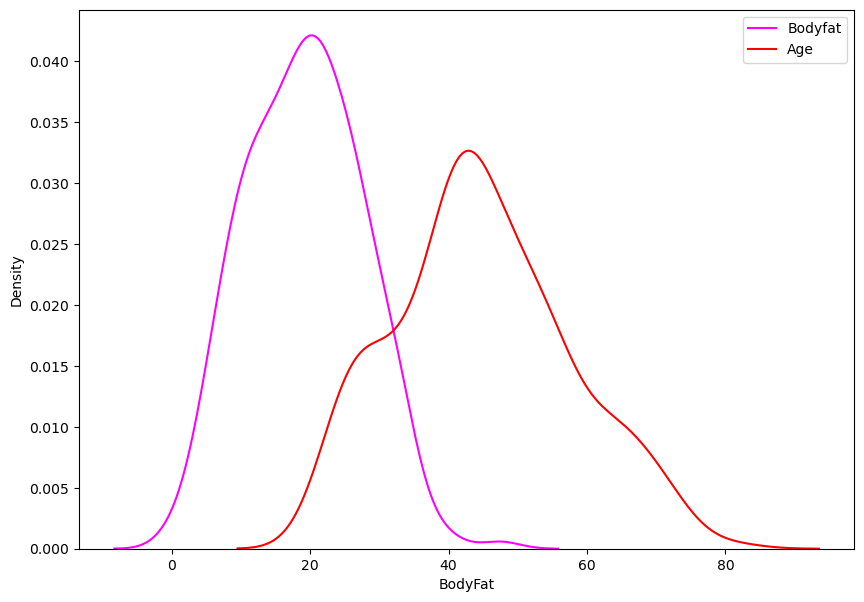

....................................................................................................
Distribution plots for Weight feature is shown below


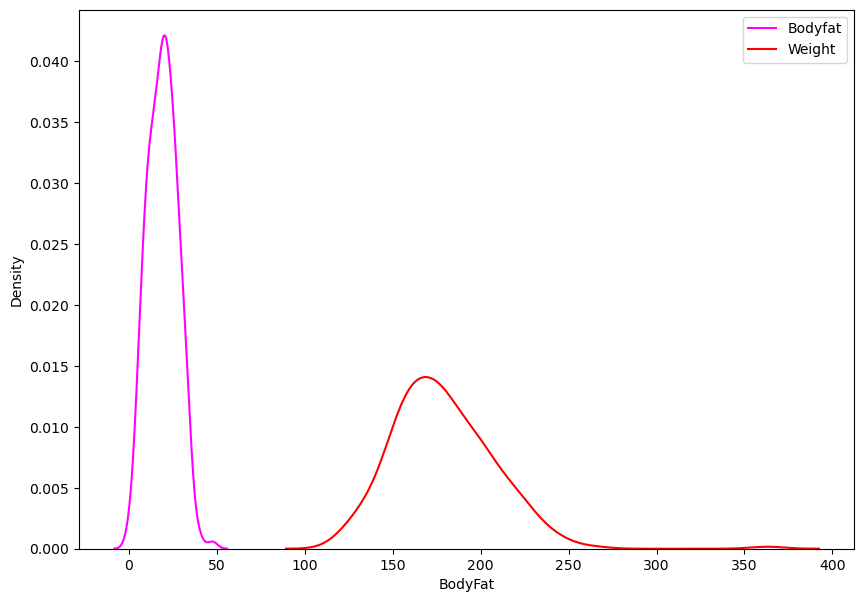

....................................................................................................
Distribution plots for Height feature is shown below


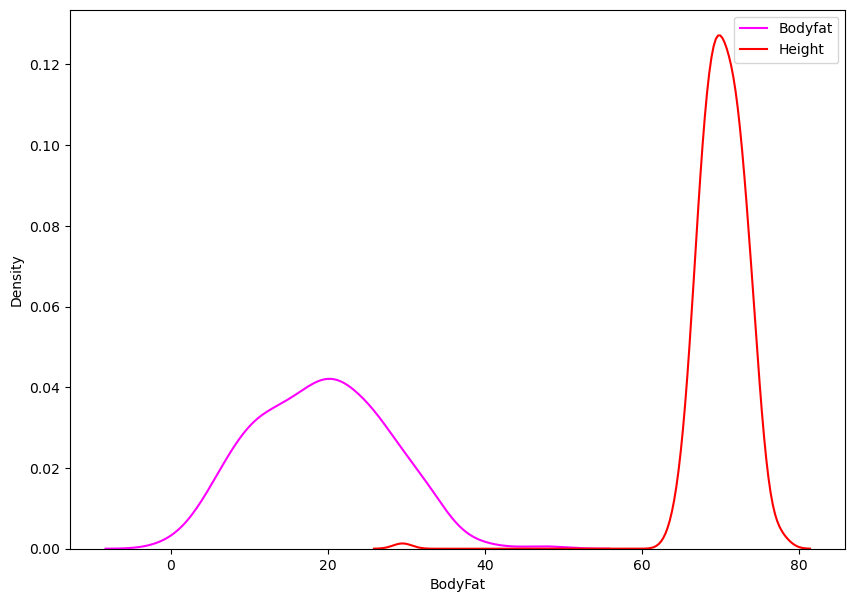

....................................................................................................
Distribution plots for Neck feature is shown below


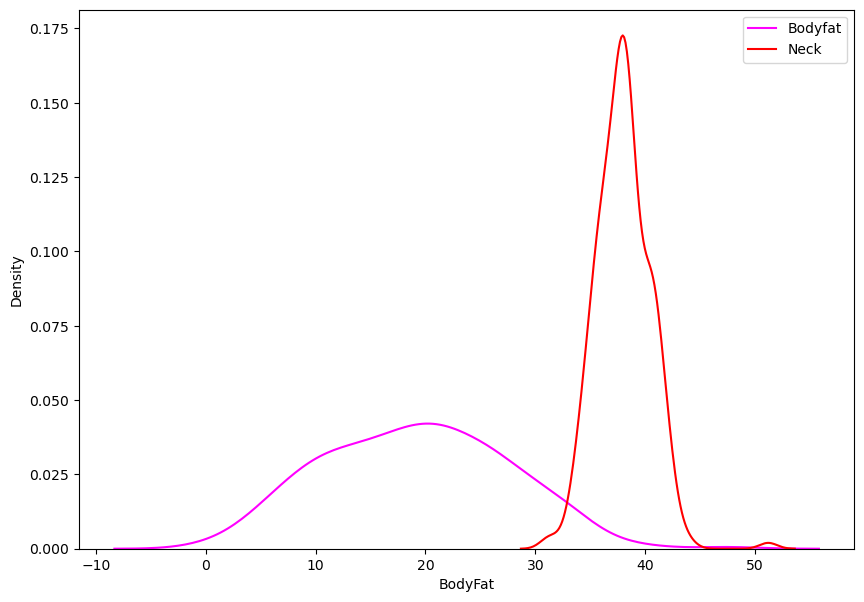

....................................................................................................
Distribution plots for Chest feature is shown below


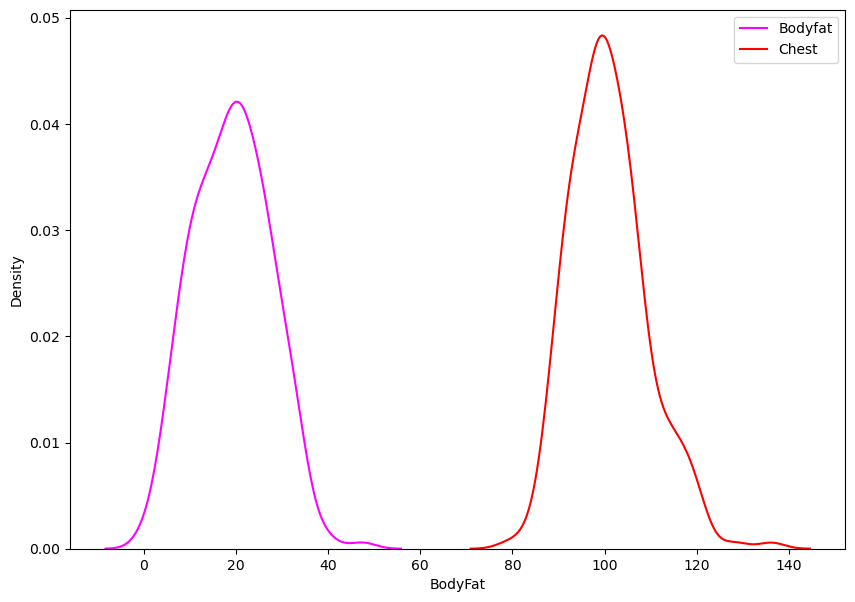

....................................................................................................
Distribution plots for Abdomen feature is shown below


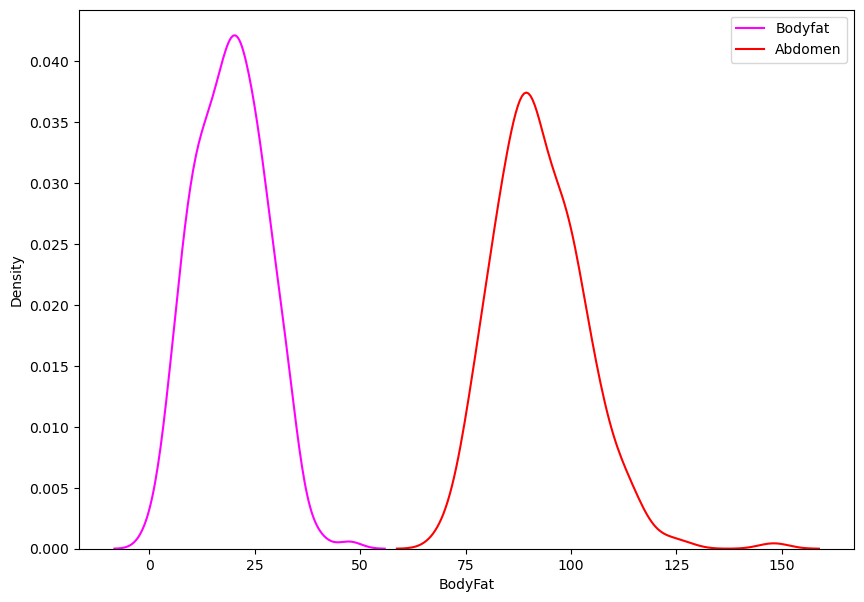

....................................................................................................
Distribution plots for Hip feature is shown below


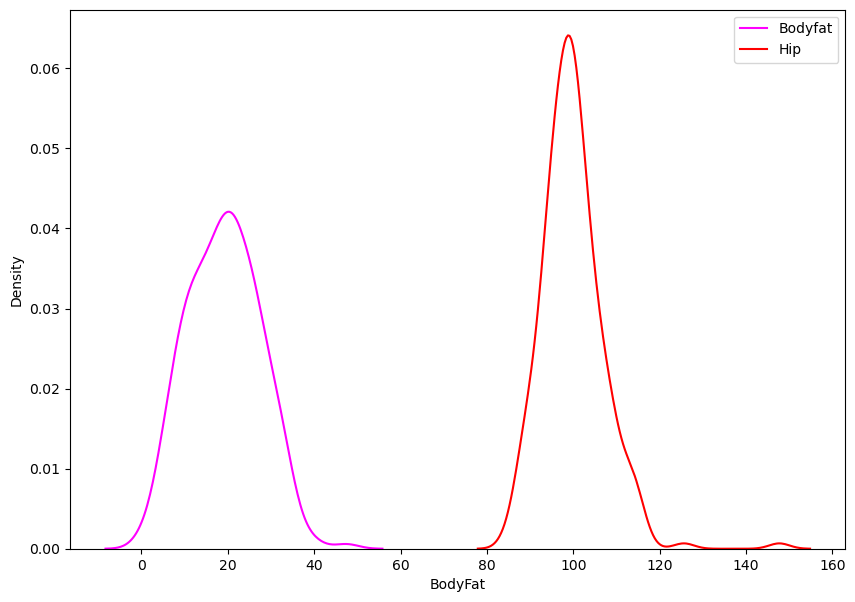

....................................................................................................
Distribution plots for Thigh feature is shown below


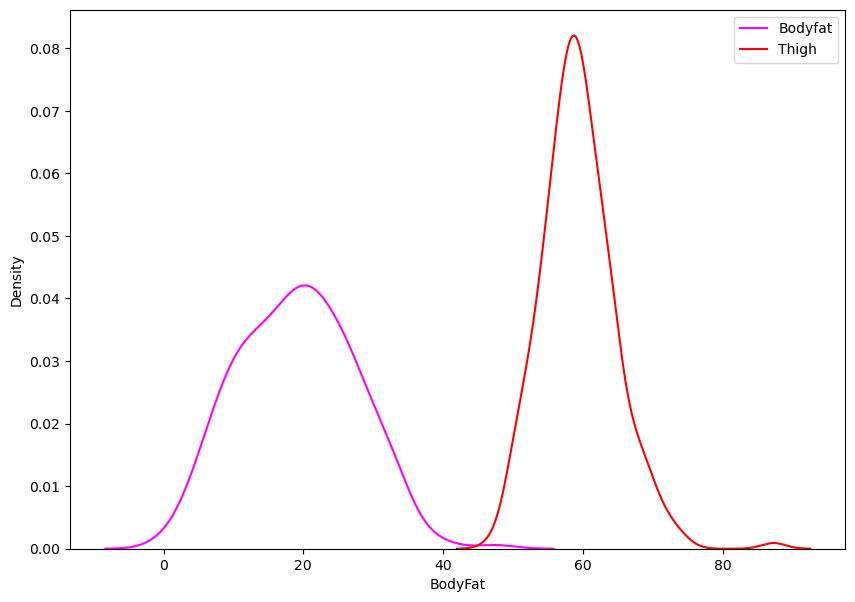

....................................................................................................
Distribution plots for Knee feature is shown below


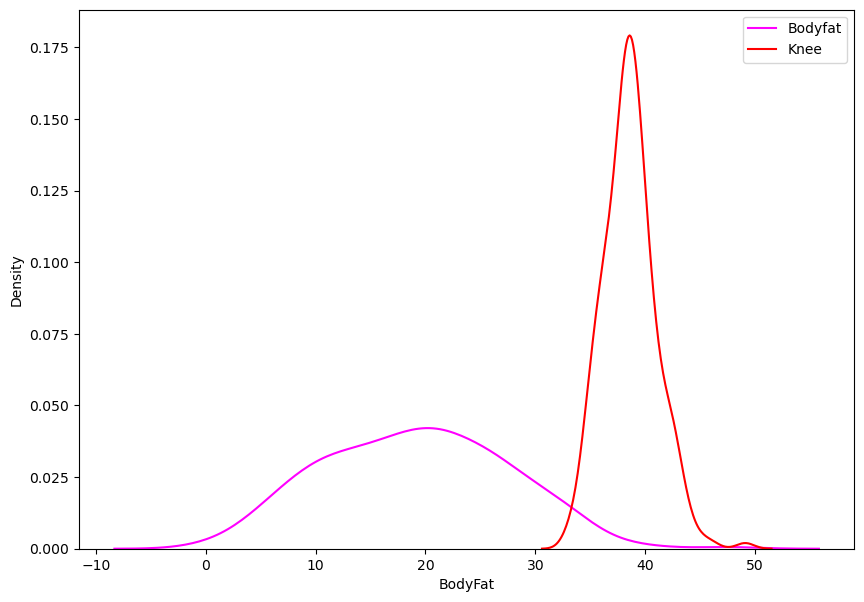

....................................................................................................
Distribution plots for Ankle feature is shown below


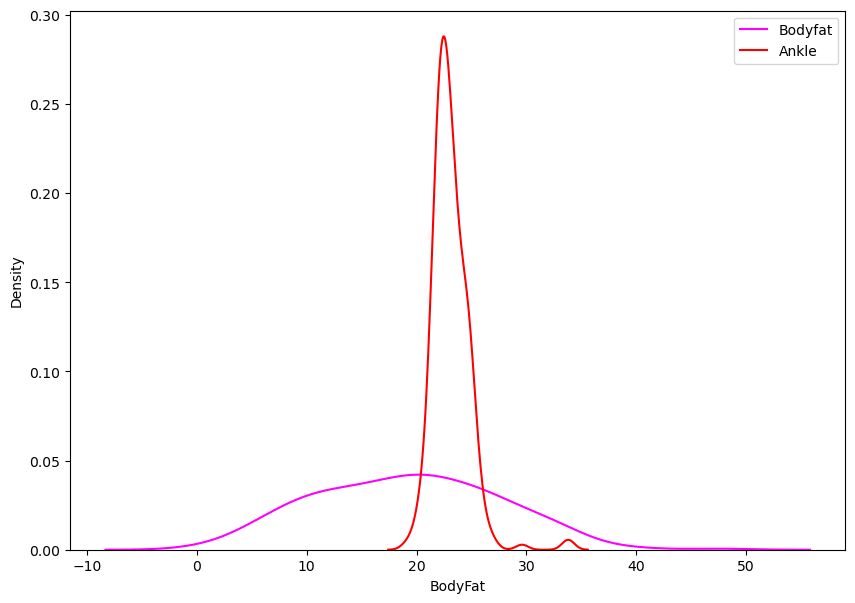

....................................................................................................
Distribution plots for Biceps feature is shown below


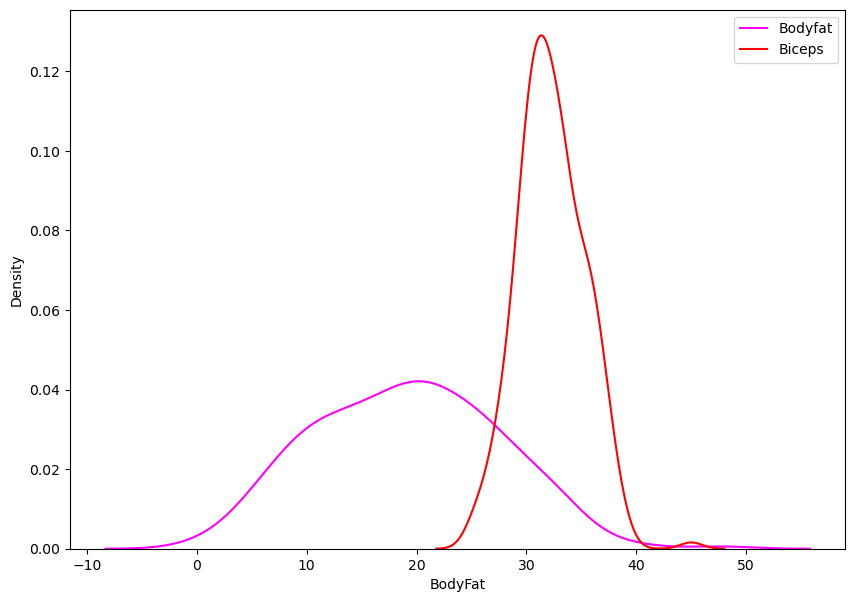

....................................................................................................
Distribution plots for Forearm feature is shown below


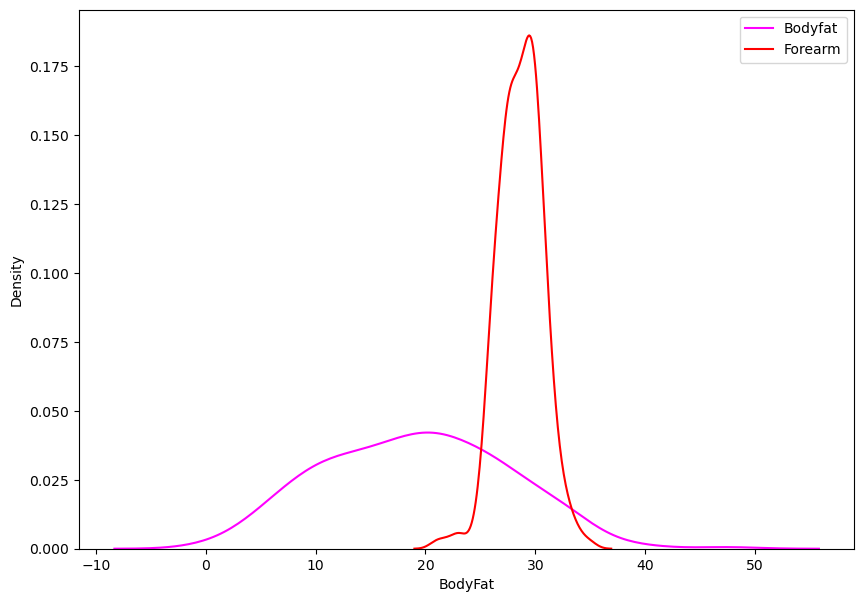

....................................................................................................
Distribution plots for Wrist feature is shown below


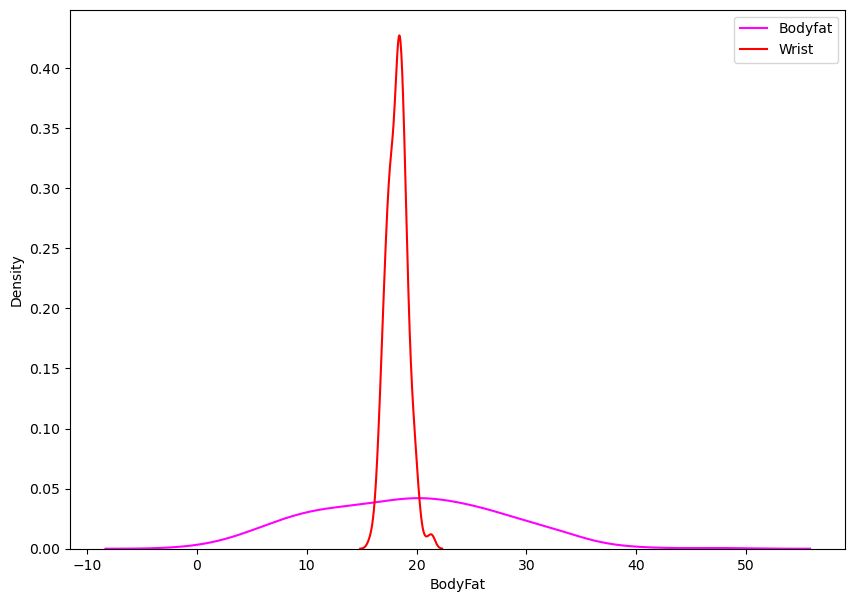

....................................................................................................


In [32]:
# define a distribution function
def plotdisplots(col):
    
    plt.figure(figsize=(10, 7))
    sns.kdeplot(df["BodyFat"], color="magenta", 
                label="Bodyfat")
    sns.kdeplot(df[col], color="red", 
                label=col)
    plt.legend();
    plt.show()
    
cols =list(df.columns)
for i in cols:
    print(f"Distribution plots for {i} feature is shown below")
    plotdisplots(i);
    print("."*100);

From the above plots we can see the features that have a similar Gaussian distribution as the target column which is the `BodyFat`. This distribution can help us eliminate features that may not be important in prediction the Body Fat.

### Distribution Analysis

In [ ]:
# function that plots the distribution